Text(0, 0.5, 'Electricity price in USD/MWh')

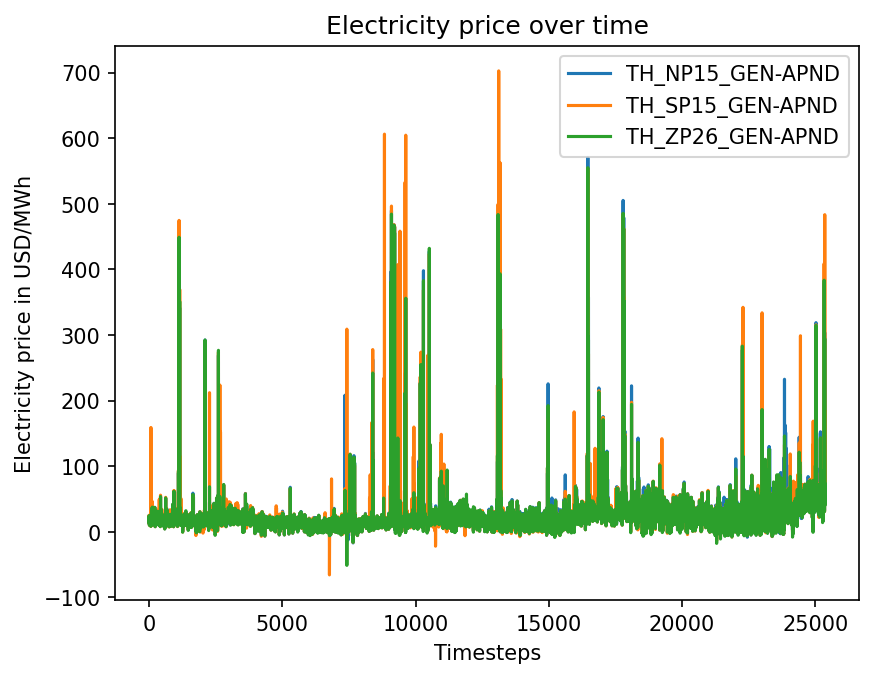

In [45]:
import pandas as pd
import matplotlib as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import pacf,acf

df_dataset = pd.read_csv(r"..\\data\\dataset_dropNA.csv")

df_pricedata = df_dataset[['TH_NP15_GEN-APND','TH_SP15_GEN-APND','TH_ZP26_GEN-APND']]

ax = df_pricedata.plot()
ax.set_title("Electricity price over time")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Electricity price in USD/MWh")

<AxesSubplot:>

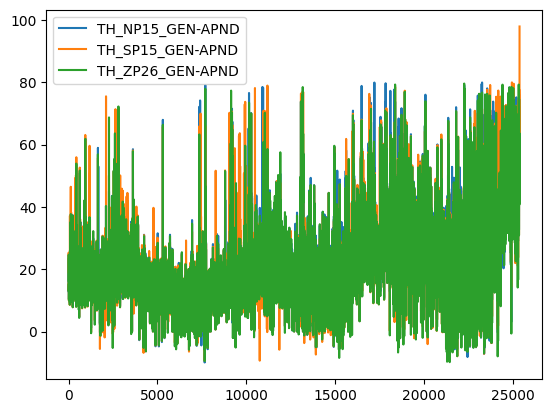

In [4]:
import numpy as np
df_pricedata = df_pricedata.apply(lambda x: [np.nan if y > 80 or y < -10 else y for y in x])
df_pricedata.interpolate(method='spline', order=1, limit=10, limit_direction='both',inplace=True)
df_pricedata.plot()

In [138]:
df_pricedata.describe()

,TH_NP15_GEN-APND,TH_SP15_GEN-APND,TH_ZP26_GEN-APND
count,25378.000000,25378.000000,25378.000000
mean,22.494506,22.156428,20.804103
std,21.646059,27.873084,21.077271
min,-16.870000,-65.570000,-51.060000
25%,13.372500,12.220000,12.152500
50%,18.650000,17.800000,17.460000
75%,27.150000,26.340000,25.727500
max,570.780000,702.700000,555.050000


Text(0, 0.5, 'Electricity price in USD/MWh')

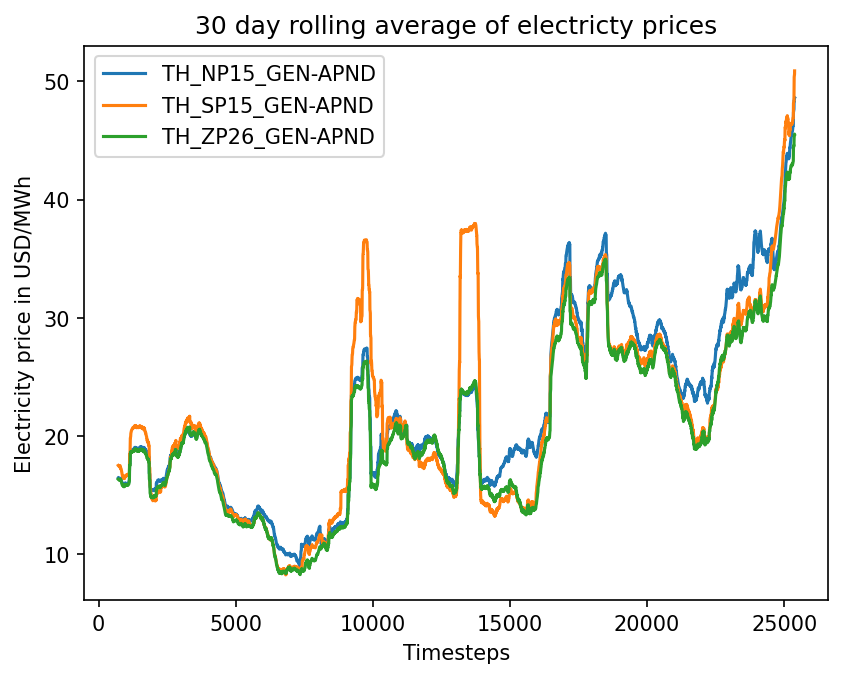

In [90]:

reliance = pd.DataFrame()
reliance['TH_NP15_GEN-APND'] = df_pricedata['TH_NP15_GEN-APND'].rolling(24*30).mean()
reliance['TH_SP15_GEN-APND'] = df_pricedata['TH_SP15_GEN-APND'].rolling(24*30).mean()
reliance['TH_ZP26_GEN-APND'] = df_pricedata['TH_ZP26_GEN-APND'].rolling(24*30).mean()

# removing all the NULL values using
# dropna() method
reliance.dropna(inplace=True)
 
# printing Dataframe
ax = reliance.plot()
ax.set_title("30 day rolling average of electricty prices")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Electricity price in USD/MWh")

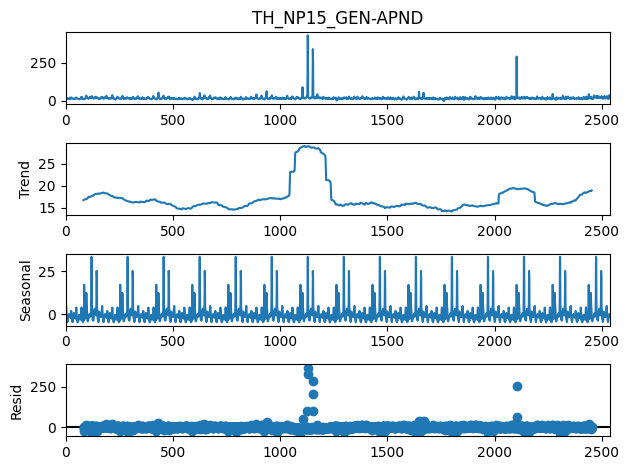

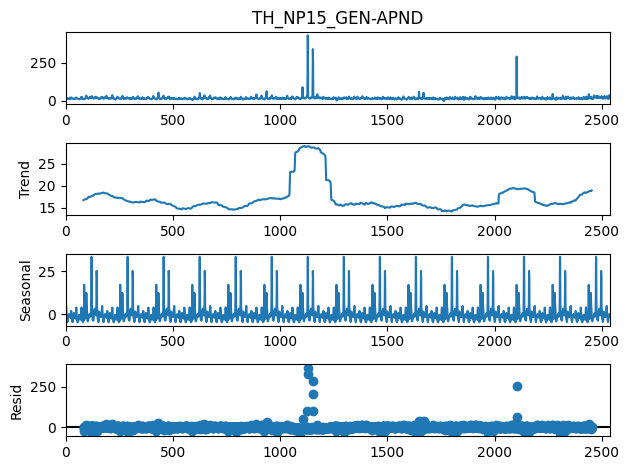

In [75]:
df_pricedata_bit = df_pricedata[(df_pricedata.index<np.percentile(df_pricedata.index, 10))]
result=seasonal_decompose(df_pricedata_bit['TH_NP15_GEN-APND'], model='Additive', period=168)
result.plot()

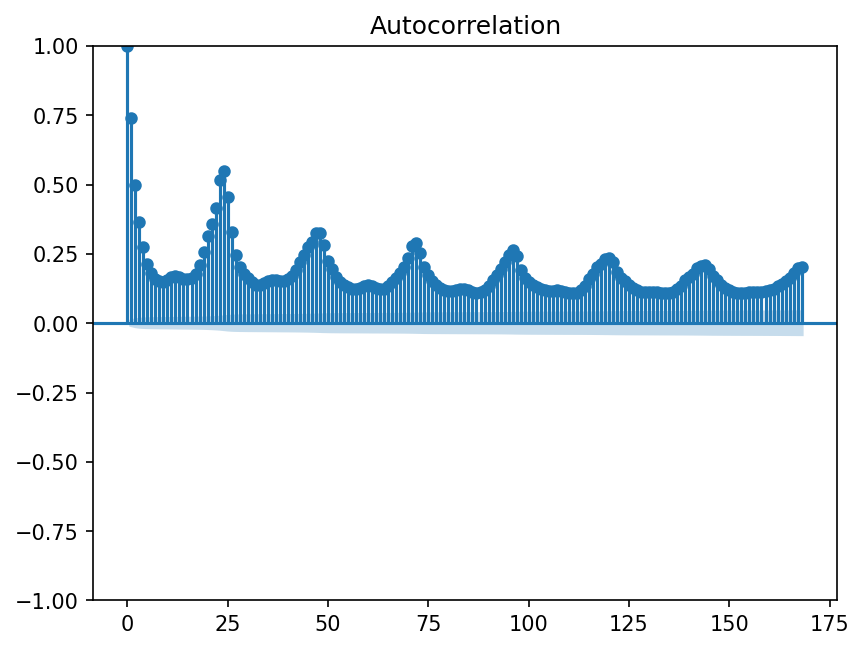

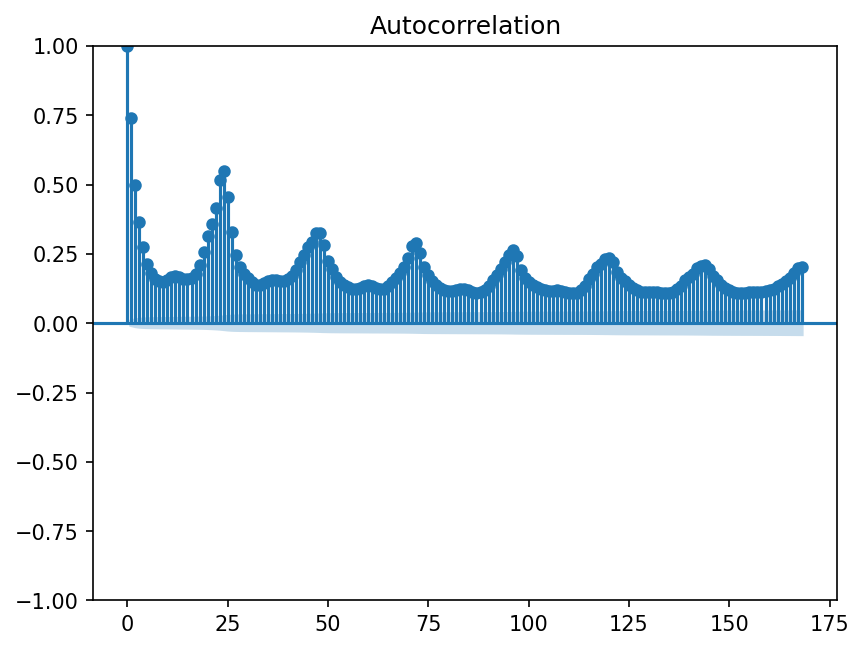

In [48]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

plot_acf(df_pricedata['TH_NP15_GEN-APND'],lags=168)

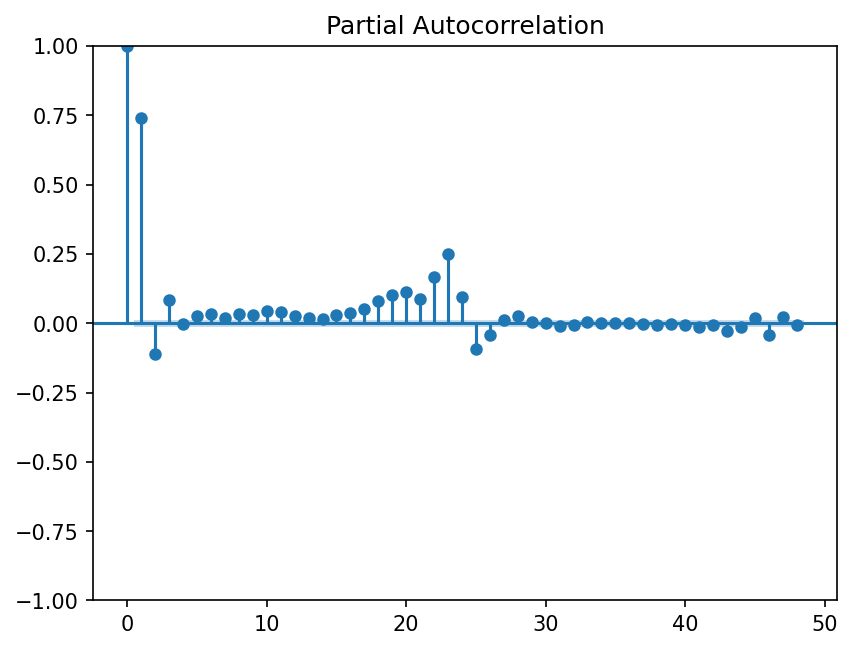

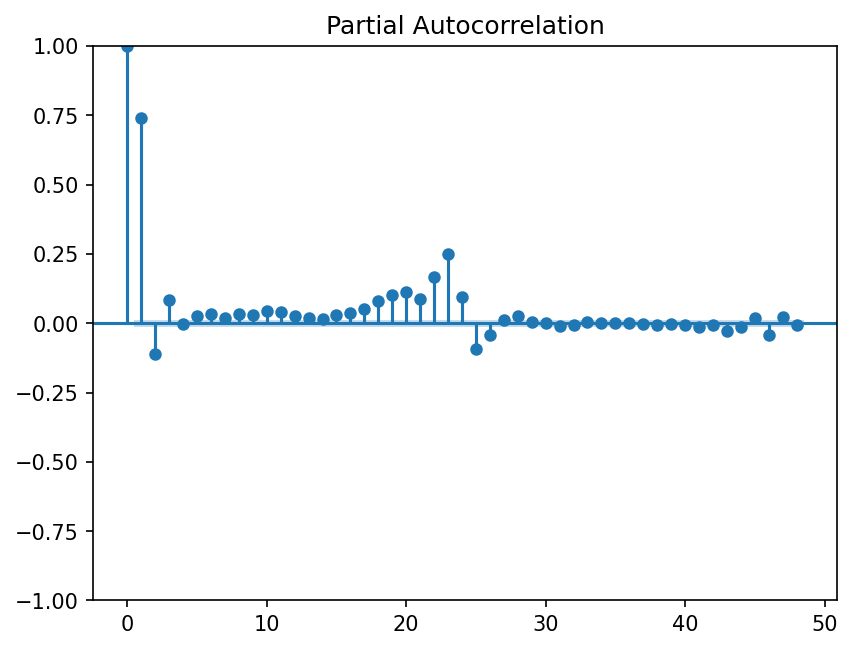

In [93]:
plot_pacf(df_pricedata['TH_NP15_GEN-APND'],lags=48)

In [12]:
import os
weather_columns = {}
for file in os.listdir(r"..\\data\\weather_data"):
    df_weather = pd.read_csv(r"..\\data\\weather_data\\"+file)
    weather_columns[file] = df_weather.columns.tolist()



<AxesSubplot:>

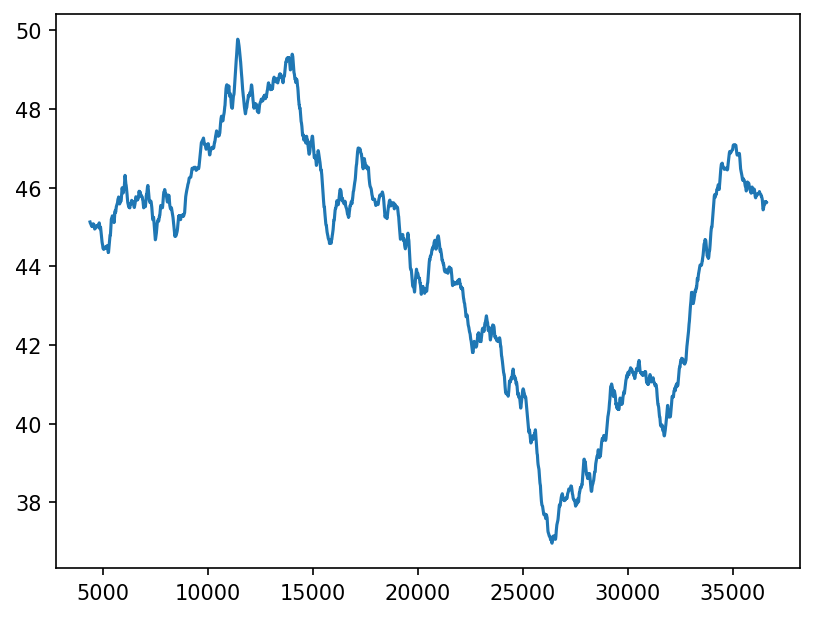

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

#columns = weather_columns['cloud_cover.csv']
df_cloudcover = pd.read_csv(r"..\\data\\weather_data\\cloud_cover.csv")
#df_cloudcover = df_dataset.loc[:,df_dataset.columns.isin(columns)]
df_cloudcover.describe()
df_cloudcover_alturas = df_cloudcover[['Pendleton Cloud Cover Forecast']]
df_cloudcover_alturas = df_cloudcover_alturas.interpolate(method='spline', order=1, limit=10, limit_direction='both')
df_cloudcover_alturas.dropna(inplace=True)
#df_cloudcover[['Alturas Cloud Cover Forecast']].plot()
result=seasonal_decompose(df_cloudcover_alturas, model='Additive', period=24*365).trend
result.plot()


In [56]:
columns = weather_columns['dew_point.csv']

df_cloudcover = df_dataset.loc[:,df_dataset.columns.isin(columns)]
df_cloudcover.describe()
df_cloudcover[['Alturas Dew Point Forecast']].plot()
result=seasonal_decompose(df_pricedata_bit['TH_NP15_GEN-APND'], model='Additive', period=168)



NameError: name 'weather_columns' is not defined

<AxesSubplot:>

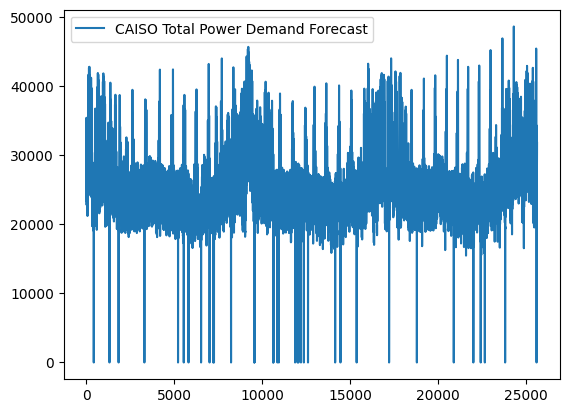

In [62]:
columns = weather_columns['forecasts.csv']

df_cloudcover = df_dataset.loc[:,df_dataset.columns.isin(columns)]
df_cloudcover.describe()
df_cloudcover[['CAISO Total Power Demand Forecast']].plot()

<AxesSubplot:ylabel='year-month'>

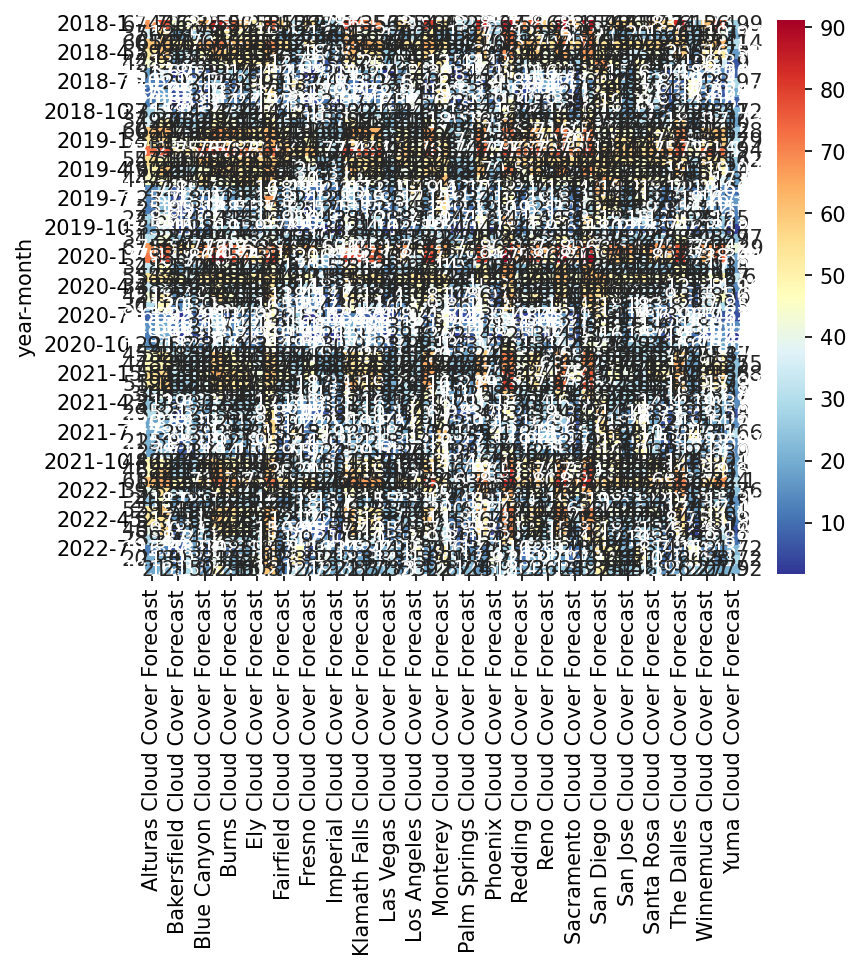

In [40]:
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
df_cloudcover = pd.read_csv(r"..\\data\\weather_data\\cloud_cover.csv")

df_cloudcover['month'] = pd.DatetimeIndex(df_cloudcover['hour']).month
df_cloudcover['year'] = pd.DatetimeIndex(df_cloudcover['hour']).year

df_cloudcover.drop(columns=['hour'],inplace=True)

df_cloudcover_monthly = df_cloudcover.groupby(['year','month']).mean()
#df_pivot = pd.pivot_table(df_cloudcover_monthly, index='YM',)
#df_cloudcover_monthly.head()

sns.heatmap(df_cloudcover_monthly, annot=True, cmap='RdYlBu_r', fmt= '.4g',)


<AxesSubplot:>

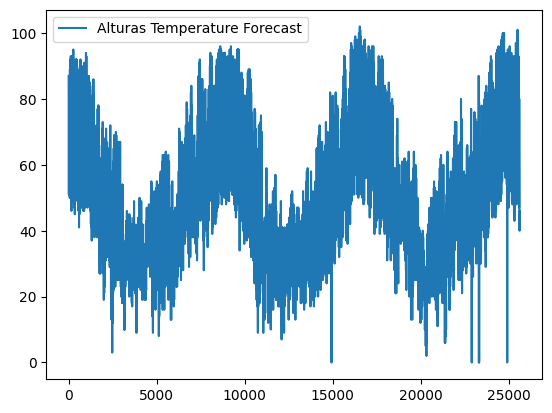

In [48]:
columns = weather_columns['temperature.csv']

df_cloudcover = df_dataset.loc[:,df_dataset.columns.isin(columns)]
df_cloudcover.describe()
df_cloudcover[['Alturas Temperature Forecast']].plot()

<AxesSubplot:>

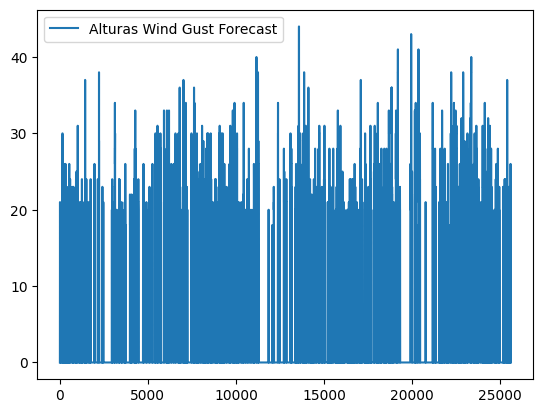

In [49]:
columns = weather_columns['wind_gust.csv']

df_cloudcover = df_dataset.loc[:,df_dataset.columns.isin(columns)]
df_cloudcover.describe()
df_cloudcover[['Alturas Wind Gust Forecast']].plot()

<AxesSubplot:>

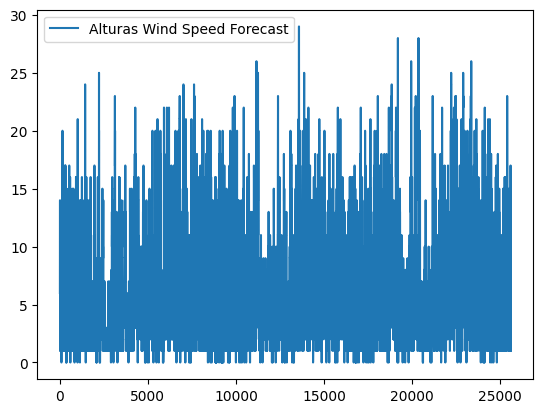

In [50]:
columns = weather_columns['wind_speed.csv']

df_cloudcover = df_dataset.loc[:,df_dataset.columns.isin(columns)]
df_cloudcover.describe()
df_cloudcover[['Alturas Wind Speed Forecast']].plot()

<AxesSubplot:>

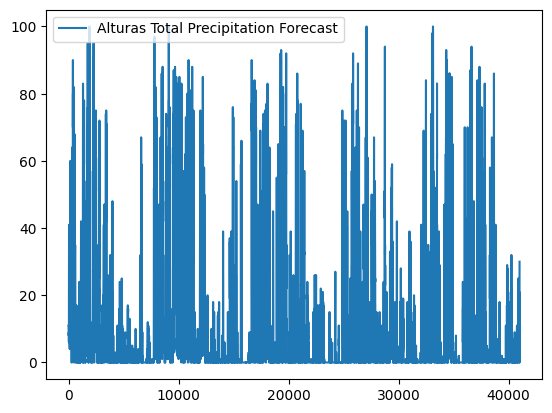

In [55]:
df_precipation_prob = pd.read_csv(r"..\\data\\weather_data\\precipitation_probability.csv")
df_precipation_prob.describe()
df_precipation_prob[['Alturas Total Precipitation Forecast']].plot()

<AxesSubplot:>

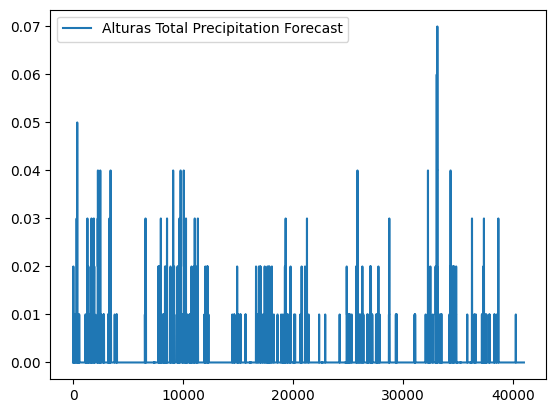

In [58]:
df_precipation_prob = pd.read_csv(r"..\\data\\weather_data\\total_precipitation.csv")
df_precipation_prob.describe()
df_precipation_prob[['Alturas Total Precipitation Forecast']].plot()

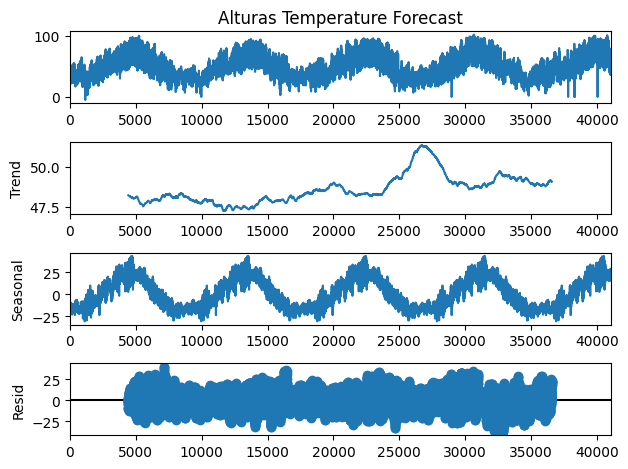

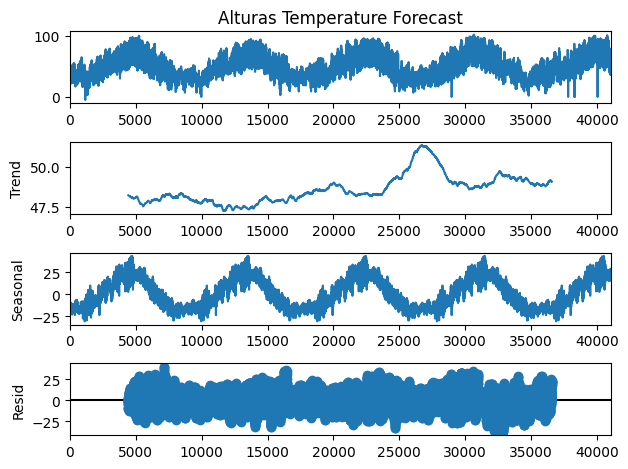

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv(r"..\\data\\weather_data\\temperature.csv")
#df['Alturas Temperature Forecast'].plot();
df.dropna(inplace=True)
result=seasonal_decompose(df['Alturas Temperature Forecast'], model='Multiplicative', period=24*365)
result.plot()

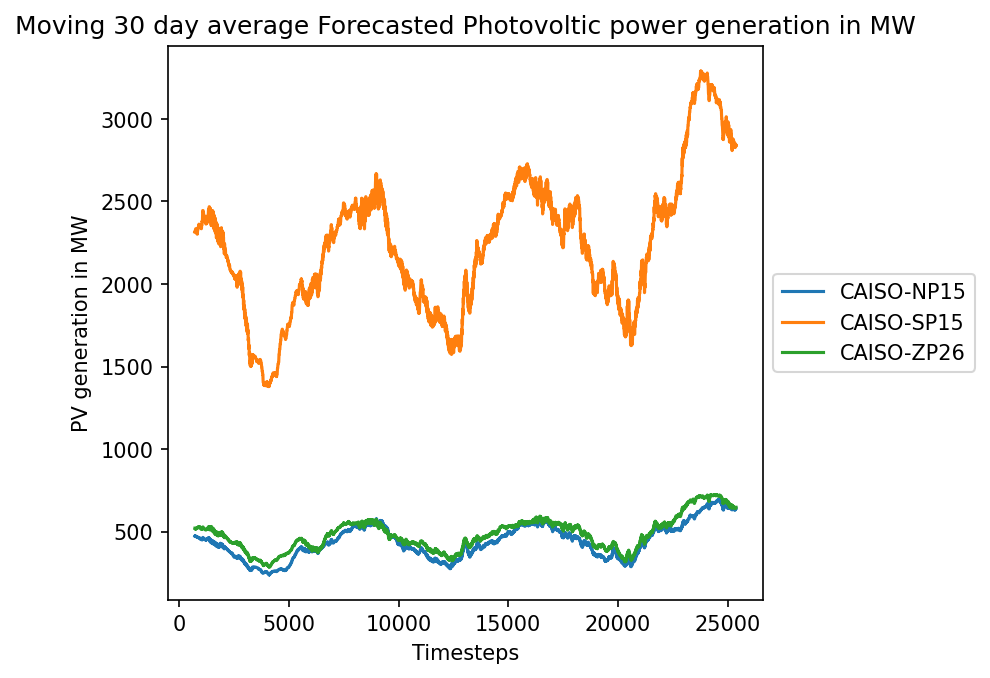

In [116]:
columns = ['CAISO-NP15 Photovoltaic Power Generation Forecast',
'CAISO-SP15 Photovoltaic power Generation Forecast',
'CAISO-ZP26 Photovolataic Power Generation Forecast']

df = pd.read_csv(r"..\\data\\dataset_dropNa.csv")
df_copy = df[columns]
df_copy.columns = df_copy.columns.str.replace(" Photovoltaic Power Generation Forecast", "")
df_copy.columns = df_copy.columns.str.replace(" Photovoltaic power Generation Forecast", "")
df_copy.columns = df_copy.columns.str.replace(" Photovolataic Power Generation Forecast", "")
df_copy = df_copy.rolling(24*30).mean()
ax = df_copy.plot()
ax.set_title("Forecasted photovoltic power generation in MW - 30 day moving average")
ax.set_xlabel("Timesteps")
ax.set_ylabel("PV generation in MW")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

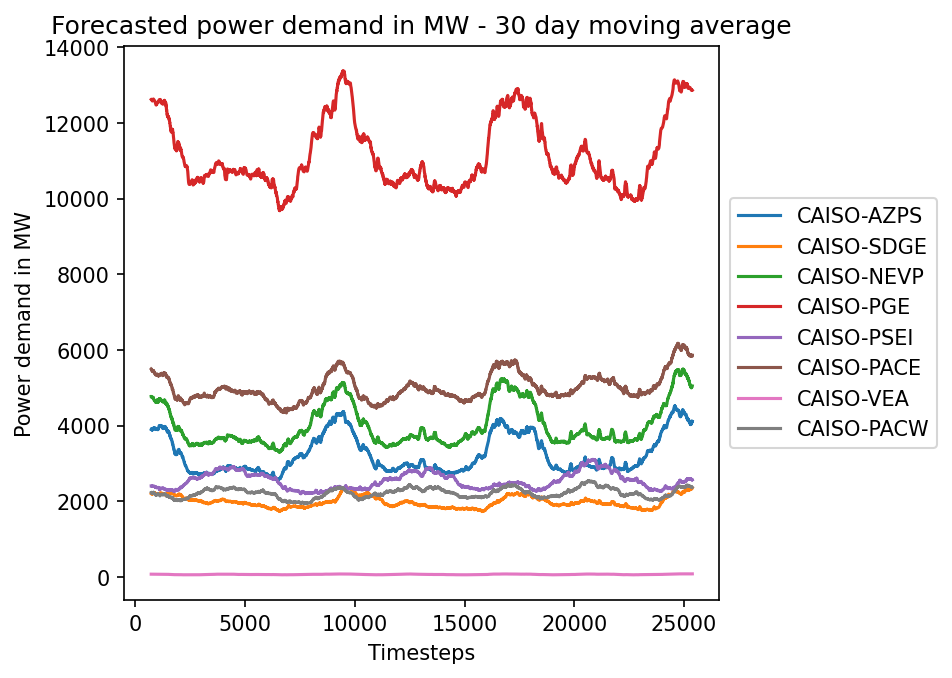

In [132]:
columns = ['CAISO-AZPS Power Demand Forecast',
'CAISO-SDGE Power Demand Forecast',
'CAISO-NEVP Power Demand Forecast',
'CAISO-PGE Power Demand Forecast',
'CAISO-PSEI Power Demand Forecast',
'CAISO-PACE Power Demand Forecast',
'CAISO-VEA Power Demand Forecast',
'CAISO-PACW Power Demand Forecast']

df = pd.read_csv(r"..\\data\\dataset_dropNa.csv")
df_copy = df[columns]
df_copy.columns = df_copy.columns.str.replace(" Power Demand Forecast", "")

df_copy = df_copy.rolling(24*30).mean()
ax = df_copy.plot()
ax.set_title("Forecasted power demand in MW - 30 day moving average")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Power demand in MW")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [137]:
columns = ['CAISO-AZPS Power Demand Forecast',
'CAISO-SDGE Power Demand Forecast',
'CAISO-NEVP Power Demand Forecast',
'CAISO-PGE Power Demand Forecast',
'CAISO-PSEI Power Demand Forecast',
'CAISO-PACE Power Demand Forecast',
'CAISO-VEA Power Demand Forecast',
'CAISO-PACW Power Demand Forecast']

df = pd.read_csv(r"..\\data\\dataset_dropNa.csv")
df_copy = df[columns]
df_copy.describe()

,CAISO-AZPS Power Demand Forecast,CAISO-SDGE Power Demand Forecast,CAISO-NEVP Power Demand Forecast,CAISO-PGE Power Demand Forecast,CAISO-PSEI Power Demand Forecast,CAISO-PACE Power Demand Forecast,CAISO-VEA Power Demand Forecast,CAISO-PACW Power Demand Forecast
count,25378.000000,25378.000000,25378.000000,25378.000000,25378.000000,25378.000000,25378.000000,25378.000000
mean,3262.253172,1987.995626,4031.424462,11209.443376,2529.367208,5027.277248,62.135196,2220.017771
std,1445.643112,730.187358,1697.368242,2667.446260,915.041954,1735.698993,27.290768,768.194860
min,192.000000,111.000000,278.000000,1.000000,174.000000,381.000000,4.000000,146.000000
25%,2581.000000,1782.000000,3447.000000,9957.000000,2221.250000,4713.000000,48.000000,2009.000000
50%,3082.500000,2047.500000,3841.000000,11086.000000,2655.000000,5232.000000,61.000000,2353.000000
75%,4021.000000,2398.000000,4735.000000,12360.000000,3104.000000,5818.000000,78.000000,2672.000000
max,7487.000000,4468.000000,9003.000000,20743.000000,4839.000000,9132.000000,143.000000,3884.000000


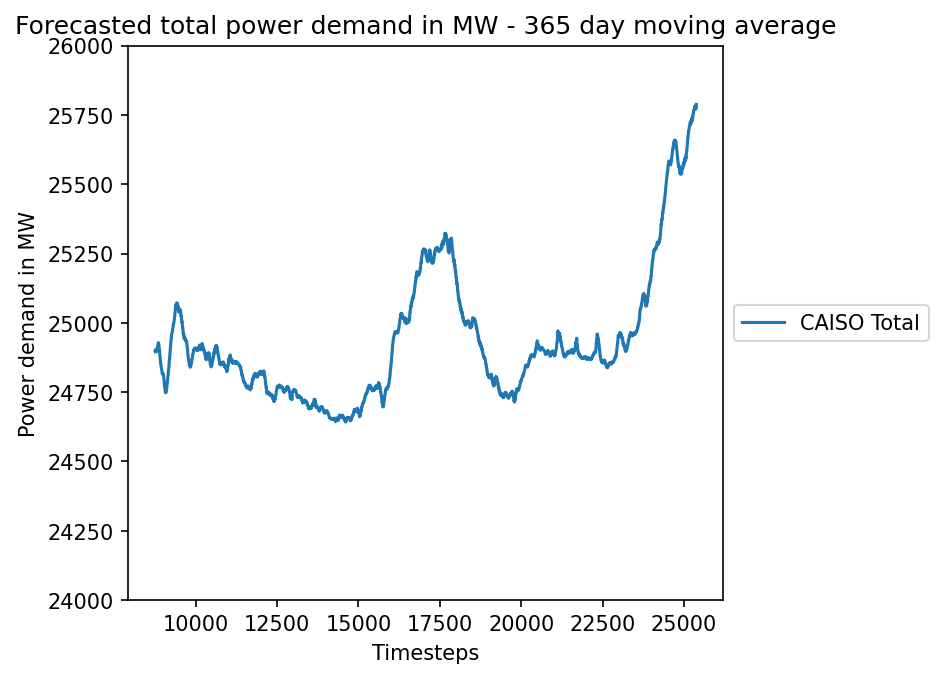

In [130]:
columns = ['CAISO Total Power Demand Forecast']

df = pd.read_csv(r"..\\data\\dataset_dropNa.csv")
df_copy = df[columns]
df_copy.columns = df_copy.columns.str.replace(" Power Demand Forecast", "")

df_copy = df_copy.rolling(24*365).mean()
ax = df_copy.plot()
ax.set_title("Forecasted total power demand in MW - 365 day moving average")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Power demand in MW")
ax.set_ybound(lower=24000, upper=26000)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

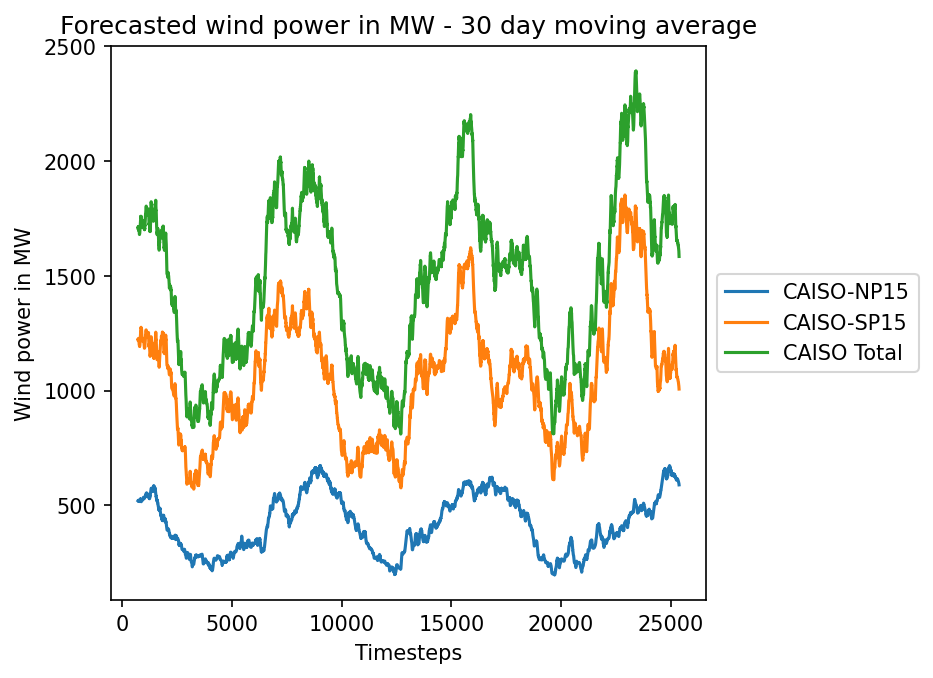

In [144]:
columns = ['CAISO-NP15 Wind Power Generation Forecast',
'CAISO-SP15 Wind Power Generation Forecast',
'CAISO Total Wind Power Generation Forecast']

df = pd.read_csv(r"..\\data\\dataset_dropNa.csv")
df_copy = df[columns]
df_copy.columns = df_copy.columns.str.replace(" Wind Power Generation Forecast", "")

df_copy = df_copy.rolling(24*30).mean()
ax = df_copy.plot()
ax.set_title("Forecasted wind power in MW - 30 day moving average")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Wind power in MW")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))